In [1]:
import numpy as np
def schwefel(x,d):
    suma=0
    for i in x:
        suma=suma+i*np.sin(np.sqrt(abs(i)))
    return (418.9829*d-suma)

def vector_aleatorio_normal(d,s):
      return np.random.normal(scale=s,size=d)
def vector_aleatorio_normal_en_el_espacio_de_x(x,s,d,media):
       return np.random.normal(loc=media,scale=s,size=d)
def schwefel_local(iteraciones,d,s):
  imagen=np.inf
  xfinal=np.zeros(d)
  media=np.random.uniform(low=-500, high=500)
  x=vector_aleatorio_normal(d,s)
  #Realizamos el problema n veces
  for i in range(iteraciones):
    media=np.random.uniform(low=-500, high=500)
    x=vector_aleatorio_normal_en_el_espacio_de_x(x,s,d,media)
    #Nuevamente, si la imagen de la iteración actual es menor a la anteriormente encontrada reasignamos la variable y guardamos el vector que la induce
    f=schwefel(x,d)
    if(f<imagen):
      imagen=schwefel(x,d)
      xfinal=x
  #Regresamos la imagen y el vector que la induce en una lista    
  return (imagen,xfinal)
def schwefel_local_alterado(repeticiones,iteraciones,d,s):
    mejor=np.inf
    for i in range(repeticiones):
      A=schwefel_local(iteraciones,d,s)
      if(A[0]<mejor):
        mejor=A[0]
        x=A[1]
    return(mejor,x)
def tabular_schwefel_30_veces(s,iteraciones,repeticiones,d):
  L=[]
  for i in range(30):
    L.append(schwefel_local_alterado(repeticiones,iteraciones,d,s))
  print(L)
  return L

In [2]:
schwefel_local(10000,2,0.1)

(0.00047659545725764474, array([420.95089541, 421.02581251]))

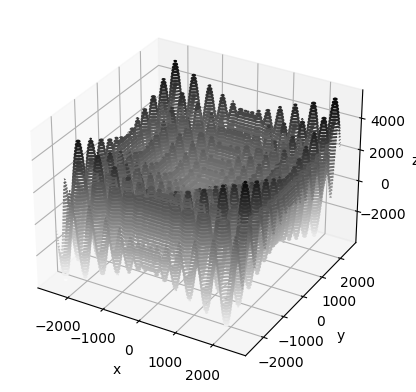

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(-2500, 2500,150)
y = np.linspace(-2500, 2500, 150)

X, Y = np.meshgrid(x, y)
Z = (schwefel((X, Y),2))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [5]:
schwefel_local_alterado(100,10000,10,0.01)

(0.00018697481755225454,
 array([420.95683801, 420.97535564, 420.96224675, 420.96069607,
        420.97072561, 420.97484026, 420.96888812, 420.97164615,
        420.97350341, 420.95833195]))

In [6]:
sol=tabular_schwefel_30_veces(0.01,10000,100,10)
print(sol)

[(0.00016162152405740926, array([420.96378017, 420.97242527, 420.97426445, 420.96636938,
       420.97383094, 420.97423133, 420.97929733, 420.96502823,
       420.96487134, 420.97008477])), (0.00018934973013529088, array([420.96856611, 420.97063975, 420.97102831, 420.96333176,
       420.98777839, 420.97498404, 420.96937869, 420.97459227,
       420.96540551, 420.9661145 ])), (0.00014077986907068407, array([420.97027565, 420.96218592, 420.97095193, 420.96594205,
       420.96817149, 420.97334021, 420.97195865, 420.97099066,
       420.96560233, 420.97024269])), (0.00016957241132331546, array([420.95749691, 420.96427049, 420.97181199, 420.97063452,
       420.9595456 , 420.97128486, 420.9651446 , 420.9620819 ,
       420.96354195, 420.96845816])), (0.00020543944810924586, array([420.96649886, 420.9634238 , 420.95515891, 420.972166  ,
       420.95924211, 420.96735953, 420.96450476, 420.95294641,
       420.97412185, 420.96775903])), (0.0001919967189678573, array([420.96483418, 420.97610

In [7]:
import statistics as st
#Ahora encontramos la media de las imágenes y cada coordenada
import numpy as np
imagenesscwefel=[]
coordenadas=[]
for i in sol:
    imagenesscwefel.append(i[0])
    coordenadas.append(i[1])
print(imagenesscwefel[0])
print("La imagen media es: ", st.mean(imagenesscwefel))
print("La desviación estandar de las imágenes es:", st.stdev(imagenesscwefel))
print("La media de las coordenadas es:", np.mean(coordenadas,axis=0))
print("La desviación estandar de las coordenadas es:",np.std(coordenadas,axis=0))
print("El mejor minimo encontrado fue: ", min(imagenesscwefel))
print("La diferencia entre el real y el mejor encontrado es: ", 0-min(imagenesscwefel))

0.00016162152405740926
La imagen media es:  0.0001768376773725322
La desviación estandar de las imágenes es: 1.6933910961035323e-05
La media de las coordenadas es: [420.96937437 420.9683718  420.96707311 420.96782074 420.97011281
 420.96778011 420.97107985 420.96885989 420.96726239 420.96893366]
La desviación estandar de las coordenadas es: [0.0046699  0.00696349 0.00646581 0.00605188 0.00634802 0.00636695
 0.00635273 0.00670493 0.00562053 0.00562324]
El mejor minimo encontrado fue:  0.00014077986907068407
La diferencia entre el real y el mejor encontrado es:  -0.00014077986907068407
